# K-Means Clustering on Isis Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



## Load the Iris dataset


In [2]:

iris = load_iris()
X = iris.data  



## Standardize features for better clustering performance


In [3]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Elbow method to find number of clusters

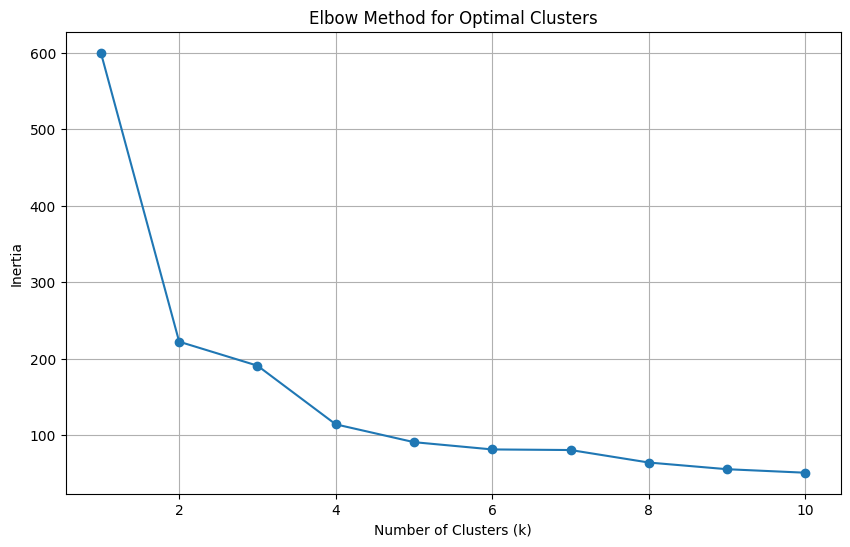

In [4]:
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.grid(True)
plt.show()

## Value of K = 3 

## Apply K-Means clustering


In [5]:
k = 3  
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, n_init=10, random_state=42)

## Get cluster labels and centroids


In [6]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_



## Reduce dimensions using PCA for visualization


In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)


## Plot the clustered data


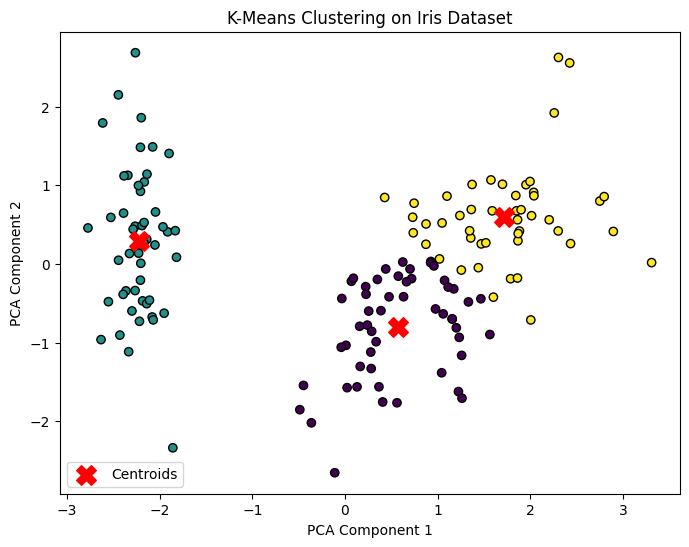

In [8]:

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.legend()
plt.show()



## Print cluster assignments


In [9]:
for i in range(k):
    print(f'Cluster {i}: {sum(labels == i)} points')

Cluster 0: 53 points
Cluster 1: 50 points
Cluster 2: 47 points


# DBSCAN clustering

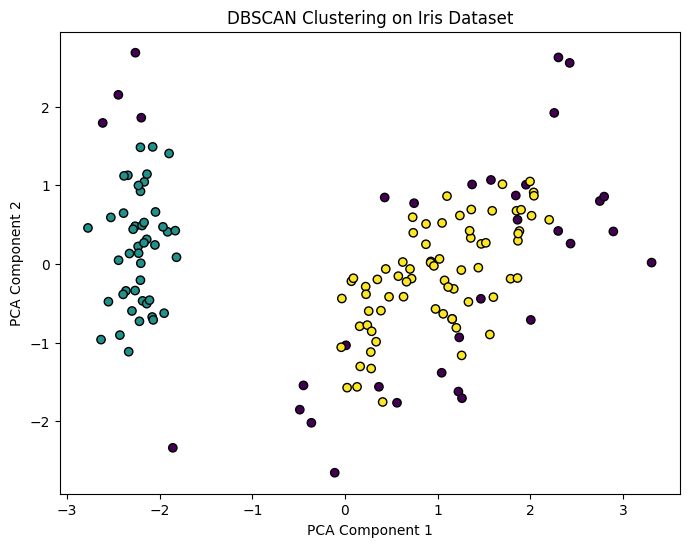

Number of clusters found by DBSCAN: 2
Number of noise points: 34


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
dbscan_labels = dbscan.fit_predict(X_scaled)

# Number of clusters found by DBSCAN (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_points = list(dbscan_labels).count(-1)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.show()

# Print DBSCAN results
print(f'Number of clusters found by DBSCAN: {n_clusters_dbscan}')
print(f'Number of noise points: {n_noise_points}')
